In [2]:
#Statistics

In [23]:
num_friends = [100, 49, 41, 40, 25, 
                # ... and lots more
                ]

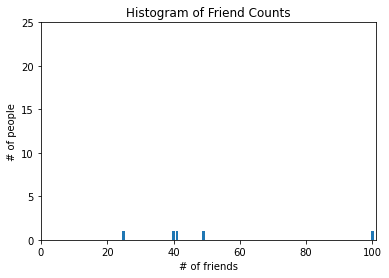

In [33]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [34]:
#Number of data points
num_points = len(num_friends)
print(num_points)

#Largest and smallest Values
largest_value = max(num_friends)
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-1]


5


In [35]:
#Central Tendencies
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

51.0

In [36]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the p'th percentile value in x"""
    p_index = int(p*len(xs))
    return sorted(xs)[p_index]

#not working because example num_friends has 200+ data points
#assert quantile(num_friends, 0.10) == 1
#assert quantile(num_friends, 0.25) == 3
#assert quantile(num_friends, 0.75) == 9
#assert quantile(num_friends, 0.90) == 13

def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

#assert set(mode(num_friends)) == {1, 6}

In [37]:
#Dispersion

# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

#assert data_range(num_friends) == 99

In [38]:
from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average, squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1)

#assert 81.54 < variance(num_friends) < 81.55

In [39]:
import math 

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

#assert 9.02 < standard_deviation(num_friends) < 9.04

def interquartile_range(xs: List[float])->float:
    """Returns the differencce between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

#assert interquartile_range(num_friends) == 6


In [40]:
from scratch.linear_algebra import dot

daily_minutes = [60,5,200,6,25]

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs)-1)

#assert 22.42 <covariance(num_friends, daily_minutes) < 22.43
#assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43/ 60

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    #if no variation, correlation is zero
    
#assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
#assert 0.24 < correlation(num_friends, daily_hours) < 0.25


In [46]:
outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

#assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
#assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58


In [47]:
#SOME OTHER CORRELATIONAL CAVEATS

In [ ]:
x = [-2,-1,0.1,2]
y = [2,1,0,1,2]
